In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('world_population.csv')

In [3]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
print("Shape:", df.shape)

Shape: (234, 17)


In [5]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
population_cols = [col for col in df.columns if 'Population' in col and 'Density' not in col]
for col in population_cols:
    df[col] = df[col].astype(int)

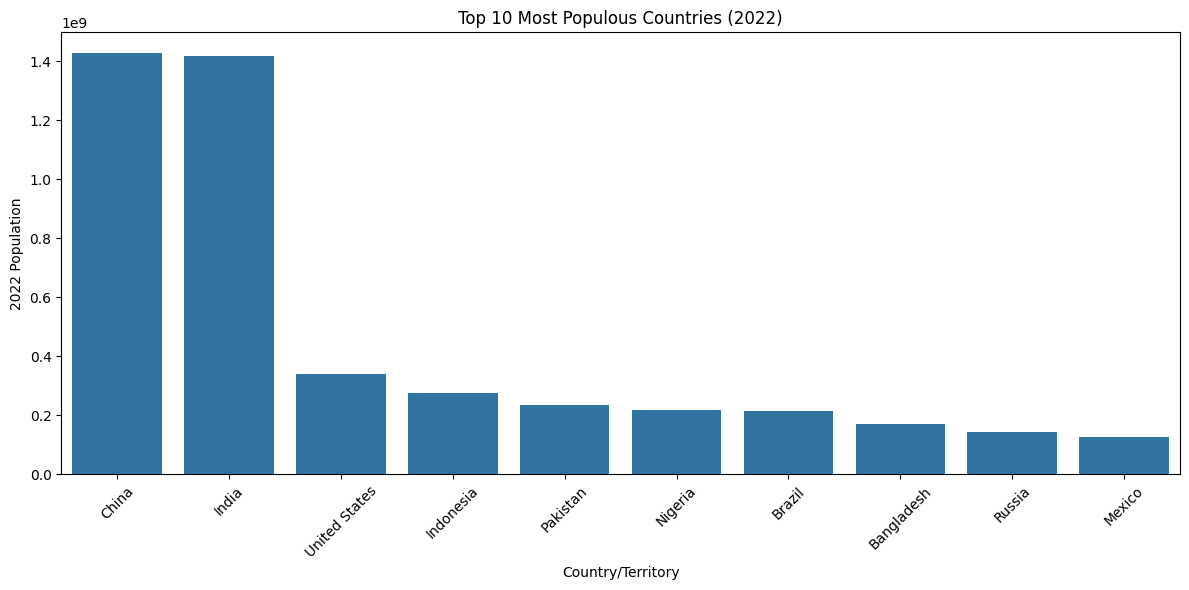

In [9]:
top10 = df.sort_values(by='2022 Population', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Country/Territory', y='2022 Population')
plt.xticks(rotation=45)
plt.title('Top 10 Most Populous Countries (2022)')
plt.tight_layout()
plt.show()

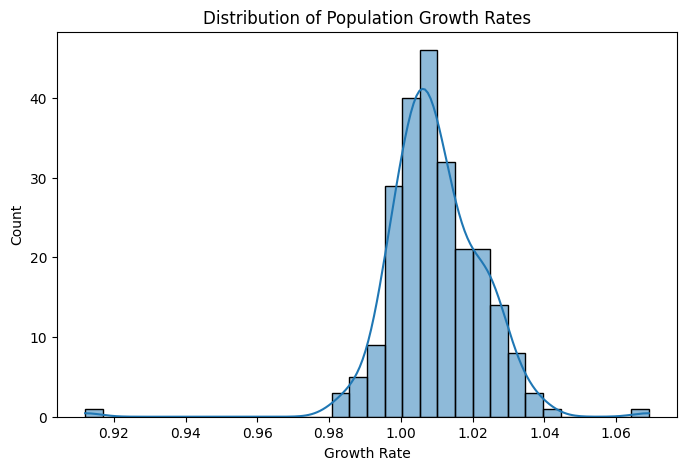

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Growth Rate'], kde=True)
plt.title('Distribution of Population Growth Rates')
plt.show()

In [11]:
# Reshape data: country-wise yearly population
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

df_melted = df.melt(id_vars=['Country/Territory'], value_vars=years,
                    var_name='Year', value_name='Population')

# Clean year column to keep just the year number
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)', expand=False).astype(int)

In [12]:
# Example: India
country_name = 'India'
india_df = df_melted[df_melted['Country/Territory'] == country_name].sort_values('Year')

# Feature & Target
X = india_df[['Year']]
y = india_df['Population']

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
future_years = pd.DataFrame({'Year': [2025, 2030, 2040]})
future_preds = model.predict(future_years)

In [15]:
for year, pop in zip(future_years['Year'], future_preds):
    print(f"Predicted Population for {country_name} in {year}: {int(pop):,}")

Predicted Population for India in 2025: 1,482,609,394
Predicted Population for India in 2030: 1,568,086,576
Predicted Population for India in 2040: 1,739,040,939


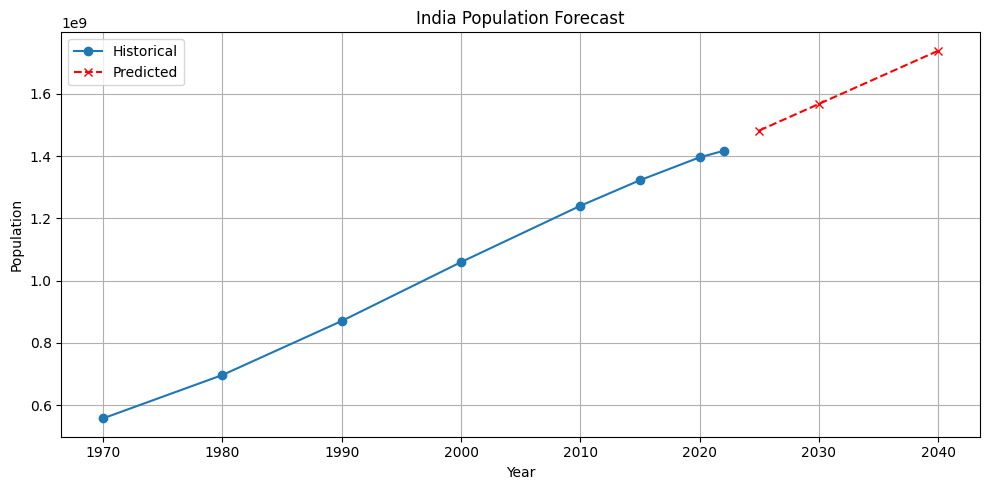

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(X['Year'], y, marker='o', label='Historical')
plt.plot(future_years['Year'], future_preds, marker='x', linestyle='--', color='red', label='Predicted')
plt.title(f'{country_name} Population Forecast')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
predictions_2030 = []

In [25]:
# Loop through each country
for country in df_melted['Country/Territory'].unique():
    country_df = df_melted[df_melted['Country/Territory'] == country].dropna()

    X = country_df[['Year']]
    y = country_df['Population']

    # Handle insufficient data (e.g., < 2 data points)
    if len(X) < 2:
        continue

    model = LinearRegression()
    model.fit(X, y)

    # Predict population for 2030
    pred_2030 = model.predict([[2030]])[0]

    predictions_2030.append({
        'Country': country,
        'Predicted Population 2030': int(pred_2030)
    })


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

In [26]:
df_predictions = pd.DataFrame(predictions_2030)

In [27]:
df_predictions = df_predictions.sort_values(by='Predicted Population 2030', ascending=False)

In [28]:
print(df_predictions.head(10))

           Country  Predicted Population 2030
92           India                 1568086576
41           China                 1560453192
221  United States                  363647533
93       Indonesia                  304246282
156       Pakistan                  262459485
27          Brazil                  238991182
149        Nigeria                  232529076
16      Bangladesh                  188228005
171         Russia                  148853972
131         Mexico                  141463633


In [29]:
sns.set_theme(style="whitegrid")  # Modern way to set the theme
sns.set_palette("Set2")

In [30]:
top10 = df_predictions.head(10)

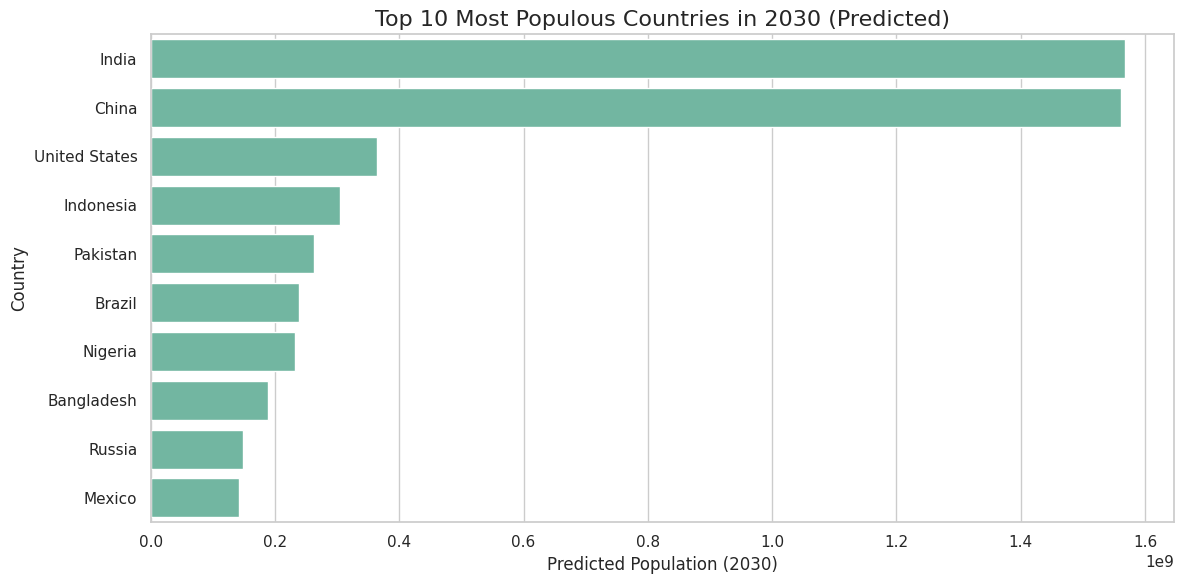

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Predicted Population 2030', y='Country', data=top10)

plt.title('Top 10 Most Populous Countries in 2030 (Predicted)', fontsize=16)
plt.xlabel('Predicted Population (2030)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

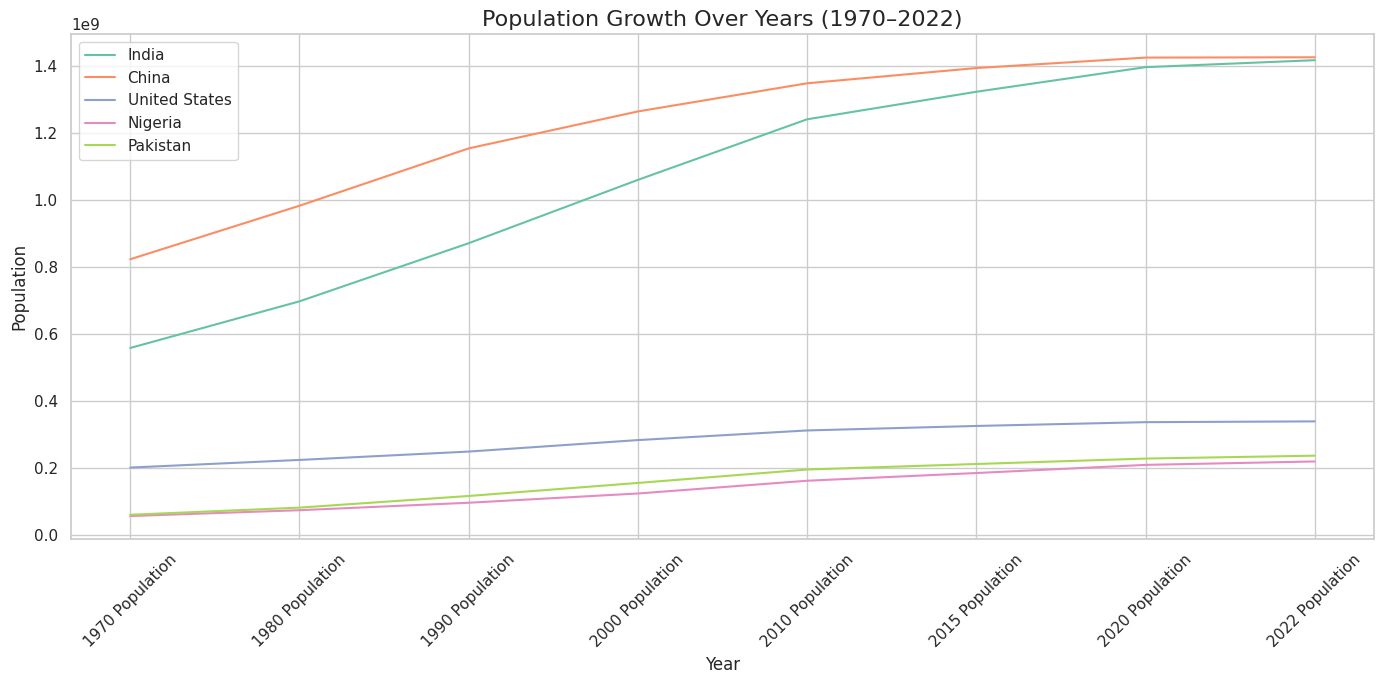

In [33]:
# Select a few countries to compare
countries_to_plot = ['India', 'China', 'United States', 'Nigeria', 'Pakistan']

# Filter data
df_selected = df[df['Country/Territory'].isin(countries_to_plot)]

# Set 'Country' as index for easier plotting
df_selected = df_selected.set_index('Country/Territory')

# Plot line graphs
plt.figure(figsize=(14, 7))
for country in countries_to_plot:
    years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
    plt.plot(years, df_selected.loc[country, years], label=country)

plt.title('Population Growth Over Years (1970–2022)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
import plotly.express as px

# World map of 2022 population
fig = px.choropleth(df,
                    locations="CCA3",
                    color="2022 Population",
                    hover_name="Country/Territory",  # <-- corrected column name
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='🌍 World Population Distribution (2022)')
fig.show()